### Integrantes das questões em grupo $(1$ & $3)$:

###### Filipe Pierri de Mendonça Nobre - $118033026$

###### Thales Monteiro Pierini Macena - $116194266$

###### Daniel Pinheiro Rodrigues - $118019420$

# Funções Uteis para ser utilizadas dentro da biblioteca:

In [1]:
"""
    RESOLVE_DIAGONAL(matriz, vetor)

Resolve o sistema linear de uma matriz diagonal e o vetor fornecidos.

**Input**

- `matriz` - Uma matriz diagonal
- `vetor` - vetor y para o sistema linear. 

**Output**

O vetor de resultado do sistema
"""
function RESOLVE_DIAGONAL(matriz, vetor) #passa matriz nxn e vetor
  lin, col = size(matriz) #queremos só o num de linhas, o num de colunas não vai ser usado

  resultado = zeros(lin) #preenchemos um vetor com tamanho igual ao número de linhas preenchido por zeros

  for i=1:lin
    resultado[i] = vetor[i] / matriz[i, i] #dividindo v[i] por m[i][i] (o valor na diagonal correspondente a posição i) e armazenando no vetor resultado em [1]
  end

  return resultado
end



RESOLVE_DIAGONAL

In [2]:
"""
    RESOLVE_TRIANNGULAR_SUPERIOR(matriz, vetor)

Resolve o sistema de uma matriz triangular superior para a matriz triangular superior e o vetor fornecidos.

**Input**

- `matriz` - Matriz triangular superior.
- `vetor` - vetor y para o sistema linear. 

**Output**

O vetor de resultado do sistema linear
"""
function RESOLVE_TRIANNGULAR_SUPERIOR(matriz, vetor) #passa matriz nxn e vetor
  lin, col = size(matriz) #queremos só o num de linhas, o num de colunas não vai ser usado
  resultado = zeros(lin) #preenchemos um vetor com tamanho igual ao número de linhas preenchido por zeros

  for i=lin:-1:1  #for decrescente, para começar pelo x[n][n]
    if i==lin
      resultado[i] = vetor[i] / matriz[i,i]  #dividindo v[i] por m[i][i] (o valor na diagonal correspondente a posição i) e armazenando no vetor resultado em [i]
    else #para os que não são x[n][n]
      aux = vetor[i] #recebe valor de v[i]
      for j=lin:-1:i+1 #for decrescente para podermos calcular o R(n)
        aux -= matriz[i,j] * resultado[j]
      end
      aux = aux / matriz[i,i]
      resultado[i] = aux
    end
  end

  return resultado
end

RESOLVE_TRIANNGULAR_SUPERIOR

In [3]:
"""
    RESOLVE_TRIANNGULAR_INFERIOR(matriz, vetor)

Resolve o sistema de uma matriz triangular inferior para a matriz triangular inferior e o vetor fornecidos.

**Input**

- `matriz` - Matriz triangular inferior.
- `vetor` - vetor y para o sistema linear. 

**Output**

O vetor de resultado do sistema linear
"""
function RESOLVE_TRIANNGULAR_INFERIOR(matriz, vetor) #passa matriz nxn e vetor
  lin, col = size(matriz)  #queremos só o num de linhas, o num de colunas não vai ser usado
  resultado = zeros(lin) #preenchemos um vetor com tamanho igual ao número de linhas preenchido por zeros

  for i=1:lin #for crescente, para começar pelo x[1][1]
    if i==1
      resultado[i] = vetor[i] / matriz[i,i] #dividindo v[i] por m[i][i] (o valor na diagonal correspondente a posição i) e armazenando no vetor resultado em [i]
    else #para os que não são x[1][1]
      aux = vetor[i] #recebe valor de v[i]
      for j=1:i-1 #for crescente para podermos calcular o R(n)
        aux -= matriz[i,j] * resultado[j]
      end
      aux = aux / matriz[i,i]
      resultado[i] = aux
    end
  end

  return resultado
end

RESOLVE_TRIANNGULAR_INFERIOR

In [4]:
"""
    DECOMPOSICAO_LU(matrix)

Realiza a decomposição LU de uma matriz quadrada nxn.

**Input**

- `matriz` - Matriz quadrada nxn.

**Output**

- `L` - Matriz quadrada triangular inferior.
- `U` - Matriz quadrada triangular superior.

Uma matriz trinagular inferior e uma matriz triangular superior tal que A = L U
"""
function DECOMPOSICAO_LU(matrix) #passa matriz nxn (por favor, use floats)
  n = size(matrix, 1)      # tamanho da matriz nXn
  auxMatrix = copy(matrix) # matriz que será subtraída a cada loop até ser uma matriz de zeros
  L = zeros(n, n)          # L como matriz zerada
  U = zeros(n, n)          # U como matriz zerada
  
  # Iterando pela diagonal
  for d = 1:n
      # Pega o número da diagonal para dividirmos a coluna escolhida
      pivot = auxMatrix[d, d]
      
      # Coloca diretamente em L e U o produto externo
      # ou seja, colocará o vetor coluna em L e o vetor linha em U
      # porque o produto de uma matriz é equivalente a soma dos produtos externos dos vetores de linha e coluna
      for i = d:n
          L[i, d] = auxMatrix[i, d]/pivot # vetor de coluna
          U[d, i] = auxMatrix[d, i]       # multiplos do vetor de coluna
      end
      
      # Realiza a subtração
      for col = d:n
          for row = d:n
              auxMatrix[row, col] -= L[row, d]*U[d, col]
          end
      end
  end
  
  return (L, U)
end

DECOMPOSICAO_LU

In [5]:
"""
    INVERSA(matriz)

Obtem a matriz inversa de uma matriz quadrada nxn utilizando decomposição LU.

**Input**

- `matriz` - Matriz quadrada nxn.

**Output**

Uma matriz quadrada nxn que é a inversa da matriz fornecida.
"""
function INVERSA(matriz) # Função recebe como entrada uma matriz e retorna sua inversa
  lin, col = size(matriz) # Pega os valores da matriz

  L, U = DECOMPOSICAO_LU(matriz) # Chama a função DECOMPOSICAO_LU para obter L e U

  IA = zeros(lin, col) # Define a inversa da matriz de entrada como uma matriz de zeros

  for i = 1:col # Para uma matriz identidade de tamanho nxn
    # Defino a coluna i da matriz identidade
    ei = zeros(col)
    ei[i] = 1

    # z = (Ua)
    # Resolvo o sistema Lz = ei
    z = RESOLVE_TRIANNGULAR_INFERIOR(L, ei)

    # Resolvo o sistema Ua = z
    ai = RESOLVE_TRIANNGULAR_SUPERIOR(U, z)

    # Coloca as colunas da matriz Inversa de A  
    for x = 1:length(ai)
      IA[x, i] = ai[x]
    end
  end

  # Retorna a matriz inversa
  return IA
end

INVERSA

In [6]:
"""
    solveLinearSystem(matriz, vetor)

Resolve o sistema linear de uma matriz e um vetor fornecidos utilizando decomposição LU.

**Input**

- `matriz` - Matriz quadrada nxn.
- `vetor` - vetor y para o sistema linear. 

**Output**

O vetor de resultado do sistema linear
"""
function solveLinearSystem(matriz, vetor)
  L, U = DECOMPOSICAO_LU(matriz)
  y = RESOLVE_TRIANNGULAR_INFERIOR(L, vetor)
  resultado = RESOLVE_TRIANNGULAR_SUPERIOR(U, y)
  return resultado
end

solveLinearSystem

In [7]:
# f é a função, n é o numero de trapézios, a e b são os limites de integração
"""
    integrarF(f, n, a, b)

Integra uma função utilizando o método dos trapezios

**Input**

- `f` - função a ser integrada.
- `n` - número de trapezios.
- `a` - limite superior de integração. 
- `b` - limite inferior de integração. 

**Output**

O valor da integral de f no intervalo [a,b]
"""
function integrarF(f, n, a, b)
  # definindo a altura do trapezio
  h = abs(b - a) / n 
  
  # Calcula o valor dos pontos
  I = f(a) + f(b)

  # Indo até o penultimo ponto pra calcular o ultimo trapezio
  for i = 1:(n - 1)
    I += 2 * f(a + i*h) 
  end

  I = I * h / 2
  
  return I
  
end

integrarF

In [8]:
"""
    média(x,y)

Calcula a média entre dois números

**Input**

- `x` - um numero qualquer x
- `y` - um numero qualquer y 

**Output**

A média dos dois valores
"""
function média(x,y)
  return (x+y)/2
end

média

In [9]:
"""
    tem_sinais_opostos(f,a,b)

Verifica se a função f tem sinais opostos no intervalo [a,b]

**Input**

- `f` - Uma função qualquer.
- `a` - Limite inferior do intervalo. 
- `b` - Limite superior do intervalo. 

**Output**

true se a função tem sinais opostos no intervalo [a,b]
"""
function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos
  return f(a)*f(b) < 0
end

tem_sinais_opostos

In [10]:
"""
    isRoot(f,a)

Verifica se a função f no ponto a é uma raiz da função

**Input**

- `f` - Uma função qualquer
- `a` - Um valor x para verificar se é raiz 

**Output**

Retorna true se a função f no ponto a é uma raiz da função
"""
function isRoot(f,a)
  return f(a)==0
end

isRoot

In [11]:
"""
    calcErroDom(a,b)

Calcula erro do dominio

**Input**

- `a` - limite inicial do intervalo
- `b` - limite final do intervalo

**Output**

O erro no dominio
"""
function calcErroDom(a,b)
  return (b - a) / 2
end

calcErroDom

In [12]:
"""
    bissecao(f,a,b,erro) 

Acha a raiz da função f no intervalo [a,b] com erro abaixo do erro máximo informado

**Input**

- `f` - Função para obter a raiz
- `a` - Limite inicial do intervalo 
- `b` - Limite final do intervalo
- `erro` - Erro máximo permitido 

**Output**

um valor aproximado x tal que f(x) = 0
"""
function bissecao(f,a,b,erro) 
  if isRoot(f,a)
      return a
  end
  if isRoot(f,b)
      return b
  end
  if !(tem_sinais_opostos(f,a,b))
      return "Não tem sinais opostos"
  end
  
  erroAtual = calcErroDom(a,b) # calcula o erro inicial
  
  iteracoes = 1 # inicializa o contador de iterações
  
  while(erroAtual > erro)
      m=média(a,b)

      if isRoot(f,m)
          return m
      end
  
      if tem_sinais_opostos(f,a,m)
          b=m
      else
          a=m
      end

      erroAtual = calcErroDom(a,b)

      iteracoes = iteracoes + 1
  end
    
  x_final=média(a,b)
  
  return x_final, iteracoes, erroAtual
end

bissecao

In [13]:
"""
    newton(f, df, x)

Calcula a raiz da função f no ponto x utilizando o método de Newton

**Input**

- `f` - Uma função
- `df` - A derivada de uma função
- `x` - Valor chute de aproximação

**Output**

valor aproximado de x tal que f(x) = 0
"""
function newton(f, df, x)
    
  fx = f(x)

  # Variáveis de tolerância
  epsilon = 1e-12 + 1e-12
  maxK = 1000 # Número máximo de iterações

  # Variáveis de controle
  k = 0 # Número de iterações

  exitflag = :inconclusivo # flag de saida inconclusiva até marcar a verdadeira
  
  resultado = (abs(fx) <= epsilon) # Se aproximou o suficiente resultado é verdadeiro
  esgotado = (k >= maxK) # Se atingiu o limite de tempo ou iterações, sinaliza na flag

  # Primeira verificação de condicao de Parada 
  # Checar se o valor de f(x) já é suficientemente pequeno
  if abs(fx) <= epsilon
      return x, fx, :sucesso
  end

  while !(resultado || esgotado)
      dfx = df(x) # Calcula a derivada f'(x)
    
      if abs(dfx) <= epsilon # checa se não existe divisao por 0
          exitflag = :divisaoPorZero
          break 
      end
    
      x = x - fx / dfx # Newton
      fx = f(x) # Atualizando o valor de f(x)
    
      k += 1 # Conta o número de iterações
      resultado = (abs(fx) <= epsilon) # Ve se o resultado conseguiu aproximar o suficiente
  
      esgotado = (k >= maxK) # Verifica se já atingiu o tempo limite ou o número máximo de iterações permitido
      if esgotado
          exitflag = :esgotado
      end 
  end

  if resultado
      exitflag = :sucesso
  end

  return exitflag, x, fx, k
end

newton

In [14]:
"""
    interpolacao(matriz)

Calcula uma os coeeficientees de um poliomio a partir de uma matriz de pontos formada pelos valores x e y, tal que a curva desse polinomio passe por todos os pontos.

**Input**

- `matriz` - Matriz de 2 dimensões onde a primeira linha são os valores de x e a segunda linha são os valores de y.

**Output**

Uma matriz com os coeficientes do polinomio
"""
function interpolacao(matriz)
  dim = size(matriz)[2] # pega dimensão
  x = 1 # Começa o valor de x
  V = zeros(Float64, dim, dim) # cria matriz de dimensão dim x dim com valores 0
  
  for l=1:dim # para cada linha
      for c=1:dim # para cada coluna
          V[l, c] = x # coloca o valor de x na matriz

          x = x * matriz[1, l] # multiplica o valor de x pelo valor da linha
      end

      x = 1 # volta o valor de x para 1
  end

  arrayQuoeficientes = solveLinearSystem(V,matriz[2, :]) # Resolve o sistema
  return arrayQuoeficientes
end

interpolacao

In [15]:
"""
    vandermonde(x,y,grau)

Monta a matriz de vandermond baseada nos valores de x, y e no grau da matriz

**Input**

- `x` - Array com os valores de x
- `y` - Array com os valores de y
- `grau` - grau de dimensão da matriz de vandermond.

**Output**

Uma matriz de vandermond
"""
function vandermonde(x,y,grau)
  n,=size(y)
  V=zeros(n,grau+1)
  for i=1:n #linhas
      for j=1:(grau+1)
          V[i,j]=x[i]^(j-1)
      end
  end
  return V
end

vandermonde

In [16]:
"""
    regressao(x,y,grau)

Realiza regressão polinomial baseada nos valores de x, y e no grau da matriz

**Input**

- `x` - Array com os valores de x
- `y` - Array com os valores de y
- `grau` - grau de dimensão da matriz de vandermond.

**Output**

Uma função com o polinomio da regressao
"""
function regressao(x,y,grau)
  vand = vandermonde(x,y,grau)
  coeficientes = solveLinearSystem(vand,y)
  p(l) = sum(coeficientes[i+1]l^i for i in 0:grau)
  return p
end

regressao

In [17]:
using Plots

# Biblioteca

### Problema: Encontrar raíz aproximadamente (Resolver equações não-lineares) (uma variável e uma equação)

In [18]:
"""
    solveNonLinear(f, err, interval)

Calcula a raiz da função f no ponto x utilizando o método de Newton

**Input**

- `f` - Uma função f
- `err` - Um erro máximo
- `interval` - Um array [a,b] com o intervalo de busca

**Output**

valor aproximado de x tal que f(x) = 0 ou um aviso de que não houve troca de sinal
"""
function solveNonLinear(f, err, interval)
  x_final, iteracoes, erroAtual = bissecao(f,interval[1],interval[2],err)

  return x_final
end

solveNonLinear

In [19]:
f(x) = x^3 + 4
g(x) = x^7 - 160
h(x) = 16 - x^3 + x^5
af = [-100, 100]
ag = [-20, 20]
ah = [-50, 50]

println("Ex 1:")
println(solveNonLinear(f, 0.000000001, af))
println("Ex 2:")
println(solveNonLinear(g, 0.000000001, ag))
println("Ex 3:")
println(solveNonLinear(h, 0.000000001, ah))

Ex 1:


-1.5874010518018622


Ex 2:
2.0647823699982837
Ex 3:
-1.8634795102116186


### Problema: Interpolação Polinomial

In [20]:
"""
    interpolacaoPolinomial(matriz)

Realiza a interpolação polinomial, ou seja, calcula o polinomio que passe por todos os pontos da entrada.

**Input**

- `matriz` - Uma matriz de duas dimensões onde a primeira linha são os valores de x e a segunda linha são os valores de y.

**Output**

O polinomio que passe por todos os pontos da entrada
"""
function interpolacaoPolinomial(matriz)
    coeficientes = interpolacao(matriz)

    # Transformar o vetor de coeficientes em uma função
    function f(x)
        y = 0
        for i=1:size(coeficientes)[1]
            y = y + coeficientes[i] * x^(i-1)
        end
        return y
    end

    g(x) = f(x)

    return g
end 

interpolacaoPolinomial

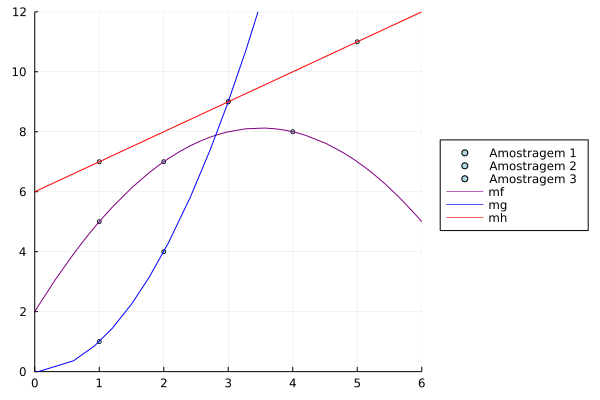

In [45]:
mf = [1 2 4; 5 7 8]
mg = [1 2 3; 1 4 9]
mh = [1 3 5; 7 9 11]

scatter(label="Amostragem 1", mf[1,:], mf[2,:], xlim=(0,6), ylim=(0,12), c=:lightblue, ms=3, legend=:outerright, legendfontsize=5, xguidefontsize=8, yguidefontsize=8)
scatter!(label="Amostragem 2", mg[1,:], mg[2,:], c=:lightblue)
scatter!(label="Amostragem 3", mh[1,:], mh[2,:], c=:lightblue)

plot!(interpolacaoPolinomial(mf), label = "mf", linecolor=:purple)
plot!(interpolacaoPolinomial(mg), label = "mg", linecolor=:blue)
plot!(interpolacaoPolinomial(mh), label = "mh", linecolor=:red)

### Problema: Regressão Polinomial (“Interpolação aproximada”)

In [22]:
"""
    regressaoPolinomial(matriz, grau)

Realiza regressão polinomial baseada nos valores de x, y e no grau da matriz

**Input**

- `matriz` - Uma matriz onde a primeira linha são os valores de x e a segunda linha são os valores de y.
- `grau` - Numero natural tal que o polinômio F(x) da saida tenha grau no máximo k.

**Output**

Uma função com o polinomio da regressao
"""
function regressaoPolinomial(matriz, grau)
    x = matriz[1, :]
    y = matriz[2, :]

    f = regressao(x,y,grau)
   return f
end

regressaoPolinomial

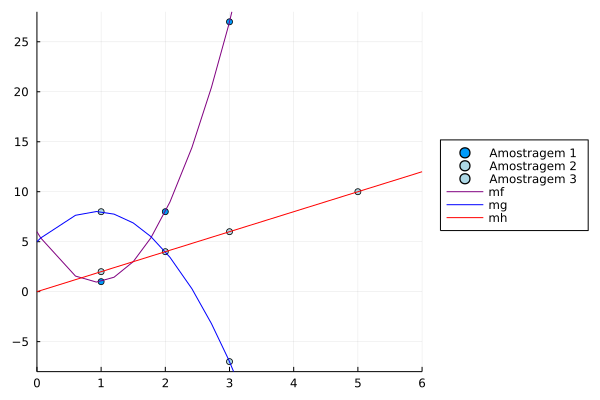

In [51]:
mf = [1 2 3; 1 8 27]
mg = [1 2 3; 8 4 -7]
mh = [1 3 5; 2 6 10]

scatter(label="Amostragem 1", mf[1,:], mf[2,:], xlim=(0,6), ylim=(-8,28), legend=:outerright)
scatter!(label="Amostragem 2", mg[1,:], mg[2,:], c=:lightblue)
scatter!(label="Amostragem 3", mh[1,:], mh[2,:], c=:lightblue)

plot!(regressaoPolinomial(mf, 2), label = "mf", linecolor=:purple)
plot!(regressaoPolinomial(mg, 2), label = "mg", linecolor=:blue)
plot!(regressaoPolinomial(mh, 2), label = "mh", linecolor=:red)

### Problema: Regressão com coeficiente lineares (generalização do problema anterior)

In [61]:
"""
    regressaoPolinomialGeneralizada(matriz, funcoes)

Realiza regressão polinomial baseada nos valores de x, y num array de funções com o objetivo de aproximar o valor de y de cada x.

**Input**

- `matriz` - Uma matriz onde a primeira linha são os valores de x e a segunda linha são os valores de y.
- `funcoes` - Um vetor de funções.

**Output**

Uma função com o polinomio da regressao obtida a partir das funções
"""
function regressaoPolinomialGeneralizada(matriz, funcoes)
    x = matriz[1, :]
    y = matriz[2, :]
    grau = size(funcoes)[1]

    vand = vandermonde(x,y,grau)
    coeficientes = solveLinearSystem(vand,y)

    function f(x)
        y = 0
        for i=1:grau
            g = funcoes[i]
            y = y + coeficientes[i] * g(x)
        end
        return y
    end

    return f
end

regressaoPolinomialGeneralizada

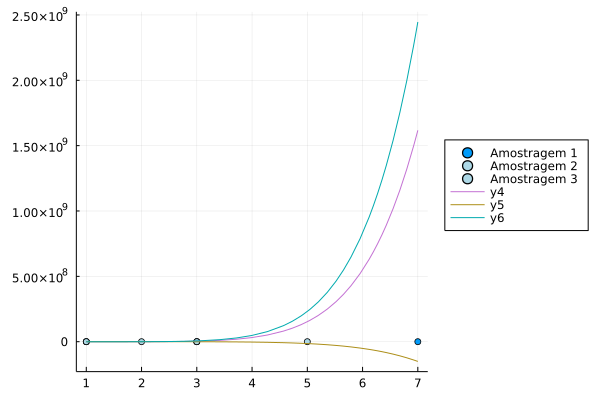

In [63]:
f(x) = x^3 + x + 4
g(x) = x^7 - 160
h(x) = x^3

vecFunc = [f; g; h]

mf = [1 3 7; 6 2027 343]
mg = [1 2 3; 6 -32 27]
mh = [1 3 5; 6 2027 125]

scatter(label="Amostragem 1", mf[1,:], mf[2,:], legend=:outerright)
scatter!(label="Amostragem 2", mg[1,:], mg[2,:], c=:lightblue)
scatter!(label="Amostragem 3", mh[1,:], mh[2,:], c=:lightblue)

plot!(regressaoPolinomialGeneralizada(mf, vecFunc))
plot!(regressaoPolinomialGeneralizada(mg, vecFunc))
plot!(regressaoPolinomialGeneralizada(mh, vecFunc))

### Calcular a norma de um vetor v


In [26]:
"""
    normaliza(vetor)

Calcula a norma de um vetor, ou seja o tamanho de um vetor

**Input**

- `vetor` - Um vetor de tamanho n

**Output**

A norma do vetor
"""
function normaliza(vetor)
  aux = sum(vetor[i]^2 for i in 1:size(vetor)[1])
  return sqrt(aux)
end

normaliza

In [27]:
mf = [1; 3; 7; 5; -11; 24]
mg = [41; 2; 3; 4; 4; 9]
mh = [3; 5; 7; 8; 9; 11]

println("Ex 1:")
println(normaliza(mf))
println("Ex 2:")
println(normaliza(mg))
println("Ex 3:")
println(normaliza(mh))

Ex 1:


27.94637722496424
Ex 2:
42.50882261366456
Ex 3:
18.681541692269406


### Problema: Resolver exatamente uma sistema linear denso

In [28]:
"""
    resolverSistemaLinearDenso(matriz,vetor)

Resolve um sistema linear de uma matriz nxn e um vetor de tamanho n

**Input**

- `matriz` - Uma matris de tamanho nxn
- `vetor` - Um vetor de tamanho n

**Output**

Um vetor com o resultado dos valores das variaveies do sistema linear
"""
function resolverSistemaLinearDenso(matriz,vetor)
  return solveLinearSystem(matriz,vetor)
end

resolverSistemaLinearDenso

In [71]:
matriz1 = [
  4.0 -1.0 -1.0 0.0;
  -1.0 4.0 0.0 -1.0 ;
  -1.0 0.0 4.0 -1.0 ;
  0.0 -1.0 -1.0 4.0
]

vetor1 = [ 20.0 50.0 -15.0 45.0 ]

matriz2 = [
  1.0 2 -3;
  3.0 -1 2;
  2.0 1 1
]

vetor2 = [1.0 0 2]

matriz3 = [
 3.0 2;
 2 3
]

vetor3 = [6.0 5]

print("sistema 1: ")
print(resolverSistemaLinearDenso(matriz1,vetor1))
print("\n\n")
print("sistema 2: ")
print(resolverSistemaLinearDenso(matriz2,vetor2))
print("\n\n")
print("sistema 3: ")
print(resolverSistemaLinearDenso(matriz3,vetor3))

sistema 1: [10.625, 19.375, 3.1249999999999987, 16.874999999999996]

sistema 2: [0.0625, 1.3125, 0.5625]

sistema 3: [1.5999999999999999, 0.6]

### Problema: Resolver um sistema triangular superior

In [29]:
"""
    resolveTriangularSuperior(matriz,vetor)

Resolve o sistema linear de uma matriz triangular superior e um vetor b

**Input**

- `U` -Uma matriz triangular superior nxn U 
- `b` -um vetor b

**Output**

Um vetor com o resultado dos valores das variaveies do sistema linear
"""
function resolveTriangularSuperior(U,b)
  return RESOLVE_TRIANNGULAR_SUPERIOR(U, b)
end

resolveTriangularSuperior

In [76]:
matriz1 = [1 1 1; 0 1 1; 0 0 1]
vetor1 = [9; 5; 3]

matriz2 = [2 2 2; 0 2 2; 0 0 2]
vetor2 = [18; 10; 6]

matriz3 = [3 3 3; 0 3 3; 0 0 3]
vetor3 = [27; 15; 9]

print("Resultado 1: ")
print(resolveTriangularSuperior(matriz1, vetor1))
print("\n\n")
print("Resultado 2: ")
print(resolveTriangularSuperior(matriz2, vetor2))
print("\n\n")
print("Resultado 3: ")
print(resolveTriangularSuperior(matriz3, vetor3))

Resultado 1: [4.0, 2.0, 3.0]

Resultado 2: [4.0, 2.0, 3.0]

Resultado 3: [4.0, 2.0, 3.0]

### Problema: Resolver um sistema triangular inferior

In [30]:
"""
    resolveTriangularSuperior(matriz,vetor)

Resolve o sistema linear de uma matriz triangular superior e um vetor b

**Input**

- `L` -Uma matriz triangular superior nxn U 
- `b` -um vetor b

**Output**

Um vetor com o resultado dos valores das variaveies do sistema linear
"""
function resolveTriangularInferior(L,b)
  return RESOLVE_TRIANNGULAR_INFERIOR(L, b)
end

resolveTriangularInferior

In [74]:
matriz1 = [1 0 0; 1 1 0; 1 1 1]
vetor1 = [9; 5; 3]

matriz2 = [2 0 0; 2 2 0; 2 2 2]
vetor2 = [18; 10; 6]

matriz3 = [3 0 0; 3 3 0; 3 3 3]
vetor3 = [27; 15; 9]

print("Resultado 1: ")
print(resolveTriangularInferior(matriz1, vetor1))
print("\n\n")
print("Resultado 2: ")
print(resolveTriangularInferior(matriz2, vetor2))
print("\n\n")
print("Resultado 3: ")
print(resolveTriangularInferior(matriz3, vetor3))

Resultado 1: 

[9.0, -4.0, -2.0]

Resultado 2: [9.0, -4.0, -2.0]

Resultado 3: [9.0, -4.0, -2.0]

### Problema: Resolver um sistema diagonal

In [31]:
"""
    resolverMatrizDiagonal(D,b)

Resolve o sistema linear de uma matriz diagonal e um vetor b

**Input**

- `D` -Uma matriz diagonal nxn
- `b` -um vetor b

**Output**

Um vetor com o resultado dos valores das variaveies do sistema linear
"""
function resolverMatrizDiagonal(D,b)
  return RESOLVE_DIAGONAL(D, b)
end

resolverMatrizDiagonal

In [79]:
matriz1 = [1 0 0; 0 5 0; 0 0 9]
vetor1 = [1; 1; 1]

matriz2 = [1 0 0; 0 1 0; 0 0 1]
vetor2 = [1; 2; 3]

matriz3 = [1 0 0; 0 4 0; 0 0 9]
vetor3 = [1; 5; 9]

print("Diagonal 1: ")
print(resolverMatrizDiagonal(matriz1, vetor1))
print("\n\n")
print("Diagonal 2: ")
print(resolverMatrizDiagonal(matriz2, vetor2))
print("\n\n")
print("Diagonal 3: ")
print(resolverMatrizDiagonal(matriz3, vetor3))

Diagonal 1: [1.0, 0.2, 0.1111111111111111]

Diagonal 2: [1.0, 2.0, 3.0]

Diagonal 3: [1.0, 1.25, 1.0]

### Problema: achar a inversa de uma matriz

In [32]:
"""
    inversa(matriz)

Obtem a inversa de uma matriz A, tal que A^-1A = I

**Input**
- `A` -Uma matriz nxn

**Output**

A matriz A^-1
"""
function inversa(matriz)
  return INVERSA(matriz)
end

inversa

In [67]:
matriz1 = [1.0 2.0 3.0; 0.0 4.0 5.0; 1.0 0.0 6.0]
matriz2 = [2.0 1.0 0.0; 0.0 1.0 0.0; 1.0 2.0 1.0]
matriz3 = [1.0 -2.0 5.0; 0.0 1.0 -4.0; 0.0 0.0 1.0]

print("inversa 1: ")
print(inversa(matriz1))
print("\n\n")
print("Inversa 2: ")
print(inversa(matriz2))
print("\n\n")
print("Inversa 3: ")
print(inversa(matriz3))

inversa 1: 

[1.0909090909090908 -0.5454545454545454 -0.09090909090909083; 0.2272727272727273 0.13636363636363635 -0.2272727272727273; -0.18181818181818182 0.09090909090909091 0.18181818181818182]

Inversa 2: [0.5 -0.5 0.0; 0.0 1.0 0.0; -0.5 -1.5 1.0]

Inversa 3: [1.0 2.0 3.0; 0.0 1.0 4.0; 0.0 0.0 1.0]

### Problema: Decomposição LU

In [33]:
"""
    calcularLU(A)

Realiza a decomposicao LU de uma matriz A

**Input**
- `A` - Uma matriz nxn

**Output**

Uma matriz triangular superior U e uma matriz triangular inferior L
"""
function calcularLU(A)
  return DECOMPOSICAO_LU(A)
end

calcularLU

In [69]:
matriz1 = [1.0 2.0 3.0; 0.0 4.0 5.0; 1.0 0.0 6.0]
matriz2 = [2.0 1.0 0.0; 0.0 1.0 0.0; 1.0 2.0 1.0]
matriz3 = [1.0 -2.0 5.0; 0.0 1.0 -4.0; 0.0 0.0 1.0]

print("L1 e U1: ")
U1, L1 = calcularLU(matriz1)
print(L1, U1)
print("\n\n")
print("L2 e U2: ")
U2, L2 = calcularLU(matriz2)
print(L2, U2)
print("\n\n")
print("L3 e U3: ")
U3, L3 = calcularLU(matriz3)
print(L3, U3)

L1 e U1: 

[1.0 2.0 3.0; 0.0 4.0 5.0; 0.0 0.0 5.5][1.0 0.0 0.0; 0.0 1.0 0.0; 1.0 -0.5 1.0]

L2 e U2: [2.0 1.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0][1.0 0.0 0.0; 0.0 1.0 0.0; 0.5 1.5 1.0]

L3 e U3: [1.0 -2.0 5.0; 0.0 1.0 -4.0; 0.0 0.0 1.0][1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]

### Problema: Integração Numérica (com o número de intervalos)

In [34]:
"""
    integrar(f,n,a,b)

Realiza a integração numérica de uma função f(x) com intervalo [a,b] e numero de intervalos n

**Input**
- `f` - Uma função f para ser integrada
- `n` - Número de trapézios
- `a` - Limite superior de integração
- `b` - Limite inferior de integração

**Output**

O valor da integral de f nos limites [a,b]
"""
function integrar(f,n,a,b)
  return integrarF(f, n, a, b)
end

integrar

In [83]:
func1(x) = x^2
func2(x) = x^3
func3(x) = x^4

print("Integral 1: ")
print(integrar(func1, 100000, 0, 5))
print("\n\n")
print("Integral 2: ")
print(integrar(func2, 100000, 0, 5))
print("\n\n")
print("Integral 3: ")
print(integrar(func3, 100000, 0, 5))

Integral 1: 41.66666666875003

Integral 2: 156.2500000156268

Integral 3: 625.0000001041719